# Image Segmentation with DBSCAN

### Step - 1: Read RGB values of pixels to feed DBSCAN

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# width and height for resizing large images
width = 100
height = 100
dim = (width, height)
 
# read the image
image = cv2.imread('../../data/images/The persistence of memory - Salvador Dali.jpg')
# resize image
image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA) 
# convert to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = image.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)
print(pixel_values.shape)

(10000, 3)


### Step - 2: Use DBSCAN to find segments

In [2]:
from sklearn.cluster import DBSCAN
# find segments with DBSCAN
clustering = DBSCAN(eps=4, min_samples=10).fit(pixel_values)
np.unique(clustering.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int32)

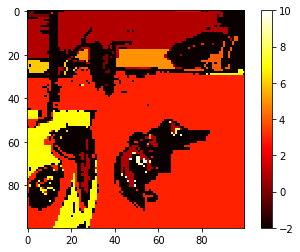

In [3]:
plt.imshow(np.where(clustering.labels_==-1, -2, clustering.labels_).reshape(width, height),cmap='hot')
plt.colorbar()

### Step - 3: Reconstruct the image using the segments

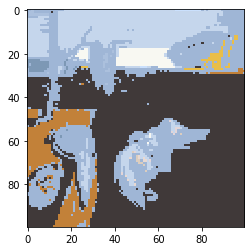

In [4]:
pixel_values_ = np.zeros(pixel_values.shape)
for label in np.unique(clustering.labels_):
    if label >= -100:
        members = np.where(clustering.labels_ == label)[0]
        for m in members:
            pixel_values_[m] = pixel_values[members[0]]
segmented_image = pixel_values_.reshape(image.shape)
# show the image
plt.imshow((segmented_image).astype(np.uint8))